# **Feature engineering-missing values**

Three types of missing values 

1)Missing completely at random(MCAR)

2)Missing data not at random(MNAR)

3)Missing at random(MAR)

**1)Mean/Median/mode replacement**

Assumption: Data is (MCAR)

Replacing NAN values with most frequent occurances of values

In [1]:
import pandas as pd
import numpy  as np

In [95]:
df=pd.read_csv("titanic_train.csv",usecols=['Age','Survived','Fare','Embarked','Cabin'])
df.head()

,Survived,Age,Fare,Cabin,Embarked
0,0,22.0,7.2500,NaN,S
1,1,38.0,71.2833,C85,C
2,1,26.0,7.9250,NaN,S
3,1,35.0,53.1000,C123,S
4,0,35.0,8.0500,NaN,S


In [96]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [97]:
df[df['Embarked'].isnull()]

,Survived,Age,Fare,Cabin,Embarked
61,1,38.0,80.0,B28,NaN
829,1,62.0,80.0,B28,NaN


In [98]:
df['c']=np.where(df['Cabin'].isnull(),1,0)

In [99]:
df[(df['Survived']==1)&(df['c']==1)].count()

Survived    206
Age         165
Fare        206
Cabin         0
Embarked    206
c           206
dtype: int64

In [100]:
df.groupby(['Survived']).mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [104]:
def mean_impute(df,feature,median):
  df['Age1']=df[feature].fillna(median)

In [105]:
mean_impute(df,"Age",df.Age.mean())

In [107]:
df.head(5)

,Survived,Age,Fare,Cabin,Embarked,c,Age1
0,0,22.0,7.2500,NaN,S,1,22.0
1,1,38.0,71.2833,C85,C,0,38.0
2,1,26.0,7.9250,NaN,S,1,26.0
3,1,35.0,53.1000,C123,S,0,35.0
4,0,35.0,8.0500,NaN,S,1,35.0


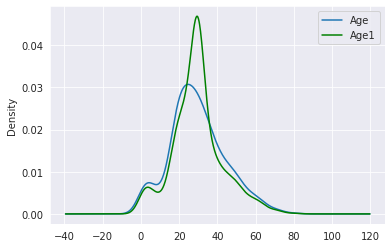

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age1.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Mean/Median Imputation:**

Advantages:

Easy to implement(Robust to outliers)

Faster way to obtain the complete dataset #### Disadvantages

Disadvantages:

Change or Distortion in the original variance

Impacts Correlation


**2)Random sample impute**

Assumption: Data is (MCAR)

Replacing NAN values with random values in dataset for that particular feature


In [109]:
import pandas as pd
df=pd.read_csv('/content/titanic_train.csv',usecols=['Age','Fare',"Survived"])

In [111]:
#finding the no of null values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [112]:
#finding null value percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [115]:
#selcting random value from age
df.Age.dropna().sample()

884    25.0
Name: Age, dtype: float64

In [117]:
#counting the null values in age
df.Age.isnull().sum()

177

In [119]:
#giving random value to all null values in age
df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [126]:
def random_sample(df,feature,m):
  #Age2=Age1=Age
  df['Age1']=df[feature].fillna(m)
  df['Age2']=df[feature]
  sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  #matching index of sample and null values in Age2
  sample.index=df[df[feature].isnull()].index
  #passing the sample values to null values in Age2
  df.loc[df[feature].isnull(),'Age2']=sample
  

In [127]:
median=df['Age'].median()

In [128]:
random_sample(df,"Age",median)

In [129]:
df

,Survived,Age,Fare,Age1,Age2
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [75]:
df.Age2.var()

212.10002044061116

In [76]:
df.Age.var()

211.0191247463081

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

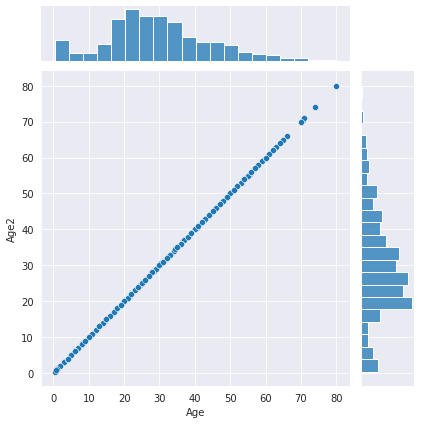

In [132]:
sns.jointplot(x='Age',y='Age2',data=df)

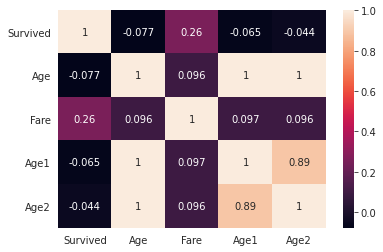

In [74]:
sns.heatmap(df.corr(),annot=True)

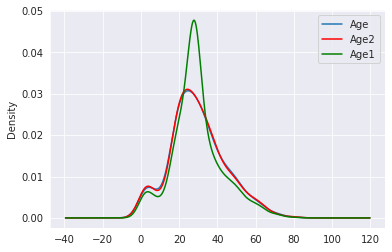

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age2.plot(kind='kde', ax=ax, color='red')
df.Age1.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Random sample imputaion:**

Advantages:

Easy To implement

There is less distortion in variance

Disadvantage

Every situation randomness wont work

**3)End of distribution imputation**

Values from 3rd standard deviation from normal ditribution curve will be used to replace the nan values


In [170]:
import pandas as pd
df=pd.read_csv('/content/titanic_train.csv',usecols=['Age','Fare',"Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


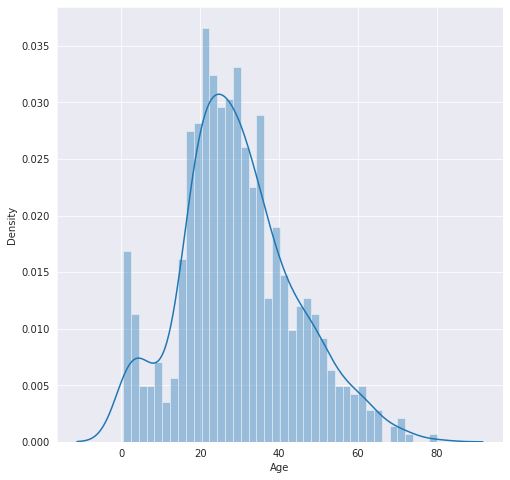

In [171]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'],bins=40)

In [172]:
extreme=df.Age.mean()+3*df.Age.std()

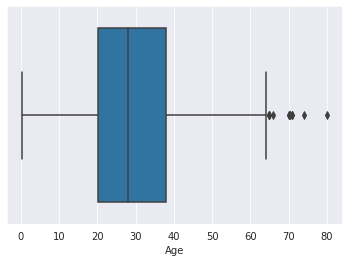

In [173]:
sns.boxplot(x='Age',data=df)

In [176]:
def extreme_impute(df,feature,median,ex):
  df["Age1"]=df[feature].fillna(ex)
  df[feature]=df[feature].fillna(median)

In [177]:
extreme_impute(df,'Age',df.Age.median(),extreme)

In [178]:
df.head(5)

,Survived,Age,Fare,Age1
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


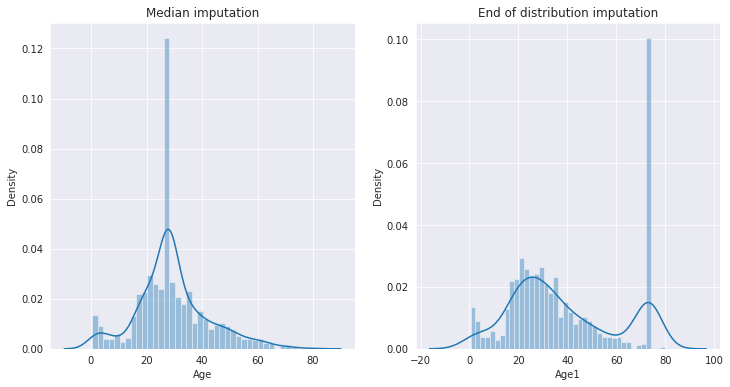

In [201]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Median imputation")
sns.distplot(df['Age'],bins=40)
plt.subplot(1,2,2)
plt.title("End of distribution imputation")
sns.distplot(df['Age1'],bins=40)

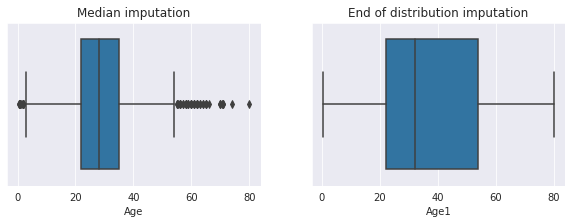

In [197]:
#outliers have been captured beacuse of end of distribution method
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Median imputation")
sns.boxplot(x='Age',data=df)
plt.subplot(1,2,2)
plt.title("End of distribution imputation")
sns.boxplot(x='Age1',data=df)